In [18]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from lens_simulation import utils
from lens_simulation.structures import SimulationParameters
from lens_simulation.Medium import Medium
from lens_simulation.Lens import Lens, LensType
from lens_simulation.beam import Beam, BeamSettings, BeamShape, BeamSpread, DistanceMode, load_beam_config

from lens_simulation.Simulation import calculate_tilted_delta_profile, calculate_delta_profile

from pprint import pprint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
beam_config = {
    "distance_mode": "Direct",
    "beam_spread": "Plane",
    "beam_shape": "Circular",
    "width": 100e-6,
    "height": 50e-6,
    "position": [0.0, 0.0], 
    "theta": 0.0,
    "numerical_aperture": None,
    "tilt": 0.0,
    "source_distance": 10e-6,
    "final_width": 10e-6,
    "focal_multiple": None
}

beam_settings = load_beam_config(beam_config)

beam_settings2 = BeamSettings(
    distance_mode=DistanceMode.Direct,
    beam_spread=BeamSpread.Plane, 
    beam_shape=BeamShape.Circular,
    width= 100e-6,
    height= 50e-6,
    position=[0e-6, 0e-6],
    source_distance = 10e-6,
    final_width = 10e-6,
    )

beam_settings = load_beam_config(beam_config)

print("Beam Settings 2")
pprint(beam_settings2)

print("Beam Settings")
pprint(beam_settings)

assert beam_settings == beam_settings2


sim_parameters = SimulationParameters(
    A = 10000, 
    pixel_size=1e-6, 
    sim_wavelength = 488e-9,
    sim_width = 1500e-6,
    lens_type=LensType.Spherical
)

output_medium = Medium(1.33)


Beam Settings 2
BeamSettings(distance_mode=<DistanceMode.Direct: 1>, beam_spread=<BeamSpread.Plane: 1>, beam_shape=<BeamShape.Circular: 1>, width=0.0001, height=5e-05, position=[0.0, 0.0], theta=0.0, numerical_aperture=None, tilt=0.0, source_distance=1e-05, final_width=1e-05, focal_multiple=None)
Beam Settings
BeamSettings(distance_mode=<DistanceMode.Direct: 1>, beam_spread=<BeamSpread.Plane: 1>, beam_shape=<BeamShape.Circular: 1>, width=0.0001, height=5e-05, position=[0.0, 0.0], theta=0.0, numerical_aperture=None, tilt=0.0, source_distance=1e-05, final_width=1e-05, focal_multiple=None)


In [127]:
# beam settings
print(f"Beam Settings: {beam_settings}")
    

Beam Settings: BeamSettings(distance_mode=<DistanceMode.Direct: 1>, beam_spread=<BeamSpread.Plane: 1>, beam_shape=<BeamShape.Circular: 1>, width=0.0001, height=5e-06, position=[-0.0, 0.0], theta=0.0, numerical_aperture=None, tilt=None, source_distance=1e-05, final_width=1e-06, focal_multiple=None)


In [128]:
beam = Beam(beam_settings)
print("beam generated")

The plane wave if constant along the optical axis. The beam final_width has been set to the initial width: 1.00e-04m
Only DistanceMode.Direct is supported for BeamSpread.Plane. The distance_mode has been set to DistanceMode.Direct.
The beam_shape (BeamShape.Circular) requires a symmetric beam. The beam height has been set to the beam width: 1.00e-04m 
beam generated


In [129]:
beam.generate_profile(sim_parameters)
print("beam profile generated")

beam profile generated


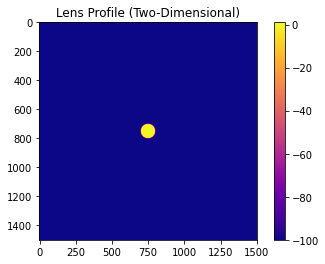

In [130]:
fig = utils.plot_lens_profile_2D(beam.lens)
plt.show()

In [131]:
sd, fd = beam.calculate_propagation_distance()
print(sd, fd)

0 1e-05


[[-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 ...
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]
 [-9867. -9867. -9867. ... -9867. -9867. -9867.]]


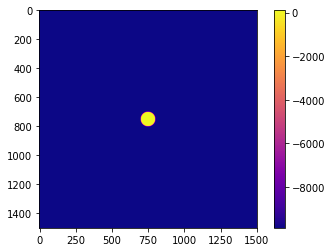

True


In [132]:
import numpy as np

delta = calculate_tilted_delta_profile(sim_profile=beam.lens.profile, 
lens=beam.lens, 
output_medium=output_medium, 
tilt_enabled=True, ytilt=0)

print(delta) 

plt.imshow(delta, cmap="plasma")
plt.colorbar()
plt.show()


delta1 = calculate_delta_profile(beam.lens.profile, beam.lens, output_medium)
# delta = calculate_tilted_delta_profile(beam.lens.profile, beam.lens, output_medium, tilt_enabled=True, ytilt=0)

print(np.array_equal(delta, delta1))

# print(delta) 

# plt.imshow(delta, cmap="plasma")
# plt.colorbar()
# plt.show()

In [ ]:



# load config
# load beam settings
# create beam
# generate profile
# calculate propagation distances


